In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

**Reading and Exploring Data**

In [2]:
data = pd.read_csv("/kaggle/input/car-data/CarPrice_Assignment.csv")
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


**Data discovery**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
for column in data.columns:
    print(f"Top 5 values in '{column}':")
    print(data[column].value_counts().nlargest(5))
    print("="*50)  

Top 5 values in 'car_ID':
car_ID
1      1
142    1
132    1
133    1
134    1
Name: count, dtype: int64
Top 5 values in 'symboling':
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
Name: count, dtype: int64
Top 5 values in 'CarName':
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: count, dtype: int64
Top 5 values in 'fueltype':
fueltype
gas       185
diesel     20
Name: count, dtype: int64
Top 5 values in 'aspiration':
aspiration
std      168
turbo     37
Name: count, dtype: int64
Top 5 values in 'doornumber':
doornumber
four    115
two      90
Name: count, dtype: int64
Top 5 values in 'carbody':
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
Top 5 values in 'drivewheel':
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
Top 5 values in 'enginelocation':
enginelocation
front    202
rear   

Extracting company name from CarName column and converting to lowercase


In [5]:
data['CompanyName'] = data['CarName'].apply(lambda x: x.split(' ')[0].lower())
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Correcting Common Misspellings in Company Names

In [6]:
corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

data['CompanyName'] = data['CompanyName'].replace(corrections)
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
data.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [9]:
data.shape

(205, 27)

**Check missing values**

In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CompanyName         0
dtype: int64

**Check for categorical columns**

In [4]:
string_columns = list(data.select_dtypes(include=['object']).columns)
string_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

**Data Exploration Visualizations**

Bar Chart of Company Name

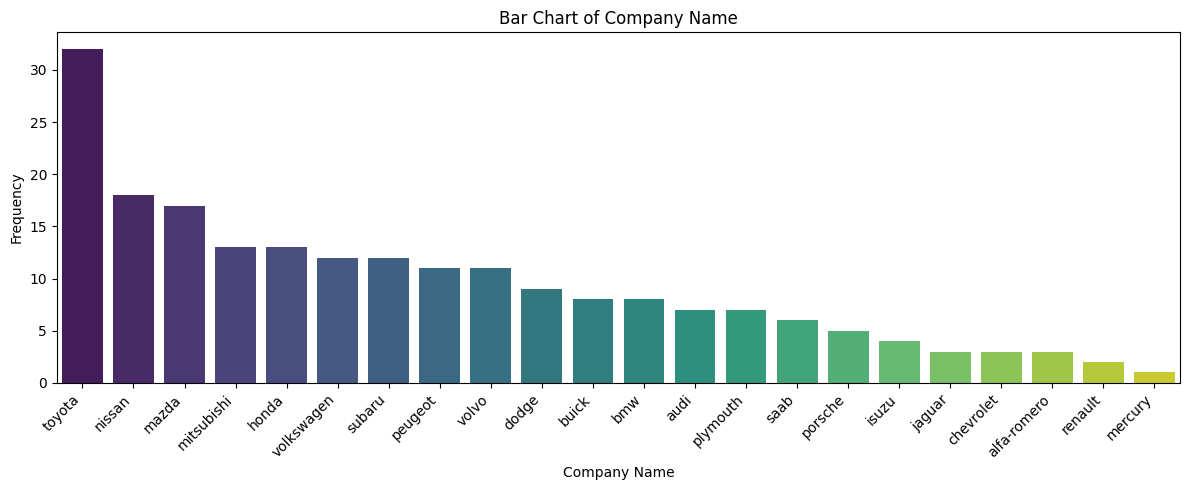

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='CompanyName', order=data['CompanyName'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.title('Bar Chart of Company Name')
plt.tight_layout()
plt.show()

Line Plot of Highway MPG

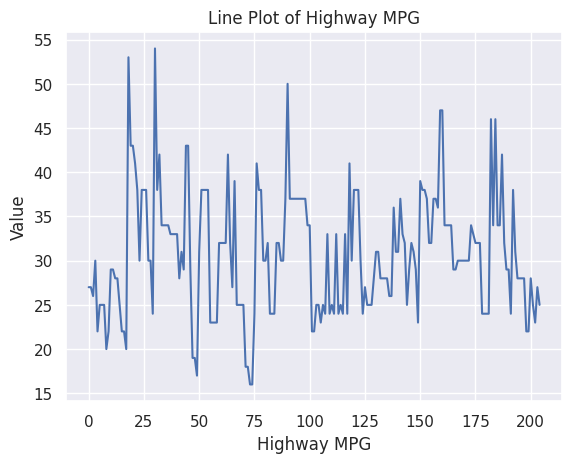

In [13]:
plt.plot(data['highwaympg'])
plt.xlabel('Highway MPG')
plt.ylabel('Value')
plt.title('Line Plot of Highway MPG')
plt.show()

Box Plot of City MPG

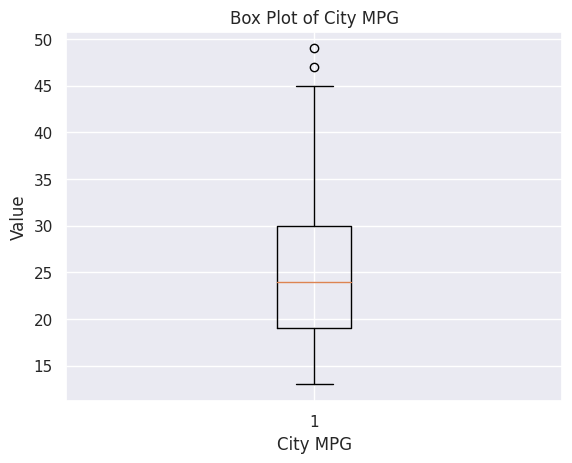

In [14]:
plt.boxplot(data['citympg'])
plt.xlabel('City MPG')
plt.ylabel('Value')
plt.title('Box Plot of City MPG')
plt.show()

Heatmap of Car Features

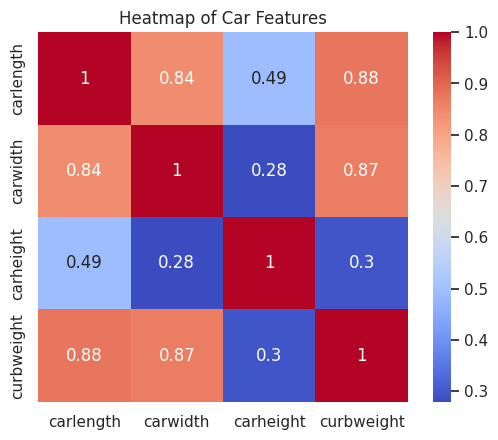

In [15]:
sns.set()
sns.heatmap(data[['carlength', 'carwidth', 'carheight', 'curbweight']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Car Features')
plt.show()


Histogram of Engine Size

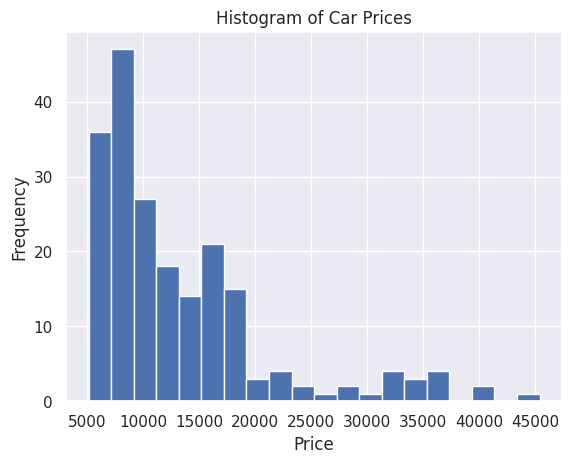

In [16]:
plt.hist(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices')
plt.show()

Scatter Plot of Horsepower vs. Price

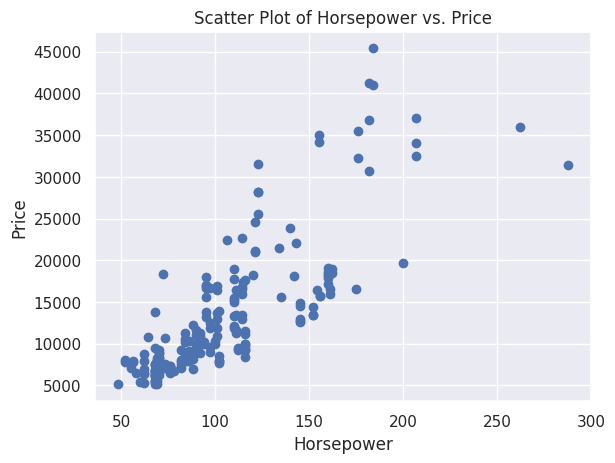

In [19]:
plt.scatter(data['horsepower'], data['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot of Horsepower vs. Price')
plt.show()

Bar Chart of Fuel Type

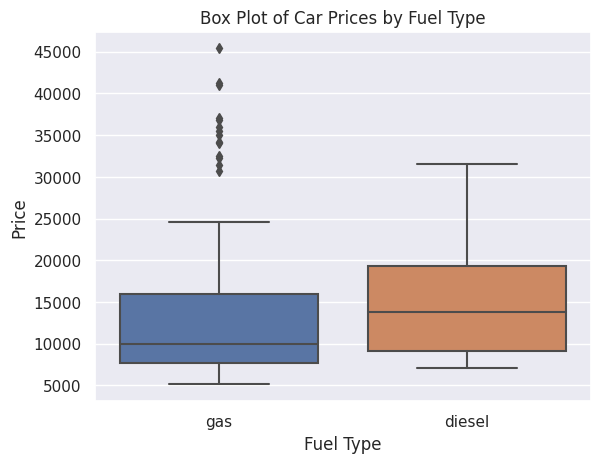

In [20]:
sns.boxplot(x='fueltype', y='price', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Box Plot of Car Prices by Fuel Type')
plt.show()

In [14]:
data.corr

<bound method DataFrame.corr of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

**Data Preprocessing**

In [7]:
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

def encode_categorical(df):
    label_encoder = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df.loc[:, column] = label_encoder.fit_transform(df[column])
    return df

def preprocess_data(df):
    numerical_columns = df.select_dtypes(exclude=['object']).columns
    df = remove_outliers(df, numerical_columns)
    df = encode_categorical(df)
    return df

data_preprocessed = preprocess_data(data)

In [9]:
data_preprocessed.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,0,0,0,3,1,0,99.8,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,0,0,0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0


**Splitting Data into Training, Validation, and Test Sets**

In [18]:
np.random.seed(2)

X_train_val, X_test, y_train_val, y_test = train_test_split(data_preprocessed.drop(columns=['price']), data_preprocessed['price'], test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=2) 

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 83
Validation set size: 28
Test set size: 28


**Training the Linear Regression Model**

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Prediction on the Test Set**

In [13]:
y_pred = lr.predict(X_test)
y_pred

array([ 7511.18316243,  8450.60170593,  9657.12762587,  6767.07314944,
        5238.56921727, 11041.24069254, 18356.85015444, 15080.41460258,
       16606.875093  , 14676.01566643, 13284.18195616, 16335.82079267,
        4231.28097813,  3238.06428846,  4218.64504727, 15354.08740554,
        6545.72355976,  7132.3720786 ,  6433.07267825, 15791.96299281,
       13953.67750344, 16691.65321929, 13199.47328222, 13311.40594005,
        9272.56148404,  7624.92518888, 16671.12651335,  6398.76567413])

**Calculating Mean Absolute Error (MAE)**

In [14]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1611.1161460593505


The DataFrame data_result displays the actual and predicted values

In [16]:
data_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data_result

,Actual,Predicted
157,7198.0,7511.183162
173,8948.0,8450.601706
61,10595.0,9657.127626
92,6849.0,6767.073149
34,7129.0,5238.569217
57,13645.0,11041.240693
2,16500.0,18356.850154
3,13950.0,15080.414603
5,15250.0,16606.875093
132,11850.0,14676.015666


**Linear Regression Plot**

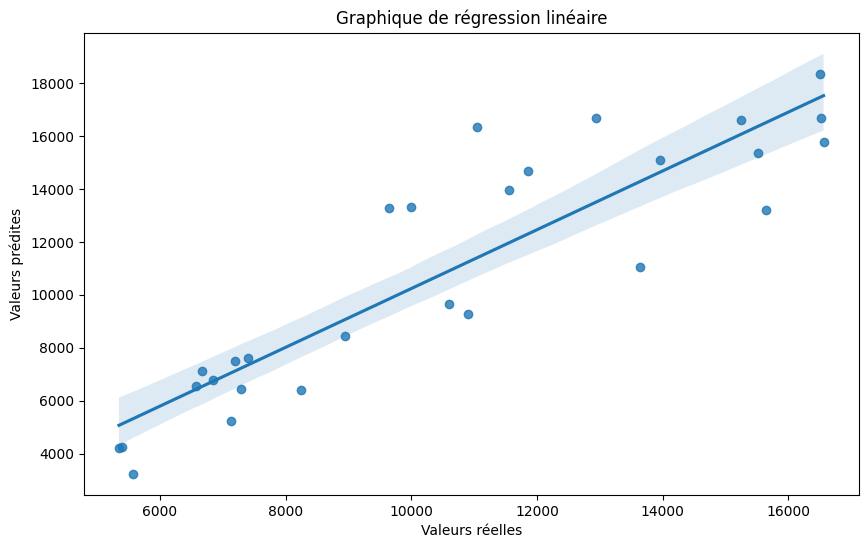

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=data_result)
plt.title('Graphique de régression linéaire')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.show()